In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading DataSet
df = pd.read_csv('Train.csv')

In [3]:
# Printing the head of the DataSet
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Shape of the dataset
df.shape

(8523, 12)

In [9]:
# Checking the null values in the dataset

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [10]:
# Filling the numerical data with its mean values
df['Item_Weight']= df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [11]:
# Filling the categorical data with its mode values
df['Outlet_Size'] = df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [12]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

array([[<AxesSubplot:title={'center':'Item_Visibility'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

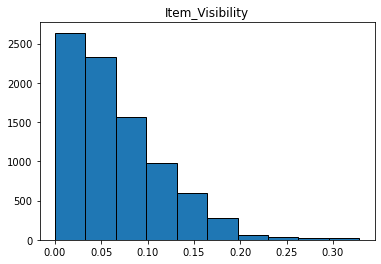

In [16]:
# histogram
plt.figure(figsize=(10,7))
df.hist(column='Item_Visibility',grid=False,edgecolor='black')

array([[<AxesSubplot:title={'center':'Item_Outlet_Sales'}>]], dtype=object)

<Figure size 720x504 with 0 Axes>

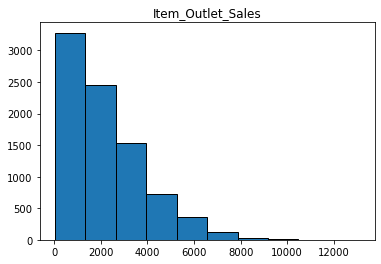

In [18]:
plt.figure(figsize=(10,7))
df.hist(column='Item_Outlet_Sales',grid=False,edgecolor='black')

<AxesSubplot:xlabel='Item_Outlet_Sales'>

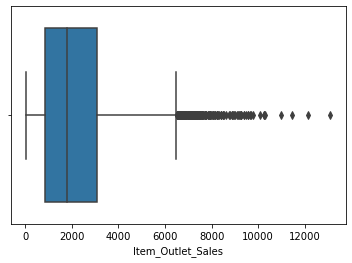

In [17]:
sns.boxplot(x=df["Item_Outlet_Sales"])

<AxesSubplot:xlabel='Item_Visibility'>

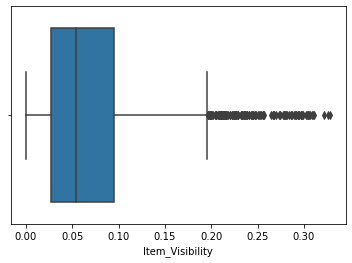

In [19]:
sns.boxplot(x=df["Item_Visibility"])

In [20]:
# Removing the Outliers
q1 = df['Item_Visibility'].quantile(0.25)
q3 = df['Item_Visibility'].quantile(0.75)

In [21]:
iqr = q3 - q1

In [22]:
iqr

0.067595815

In [23]:
upper_limit = q3 + 1.5 * iqr
lower_limit = q1- 1.5 * iqr

In [24]:
upper_limit

0.195979015

In [25]:
lower_limit

-0.07440424500000001

In [26]:
df[df['Item_Visibility'] > upper_limit]
df[df['Item_Visibility'] < lower_limit]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [27]:
new_df = df[df['Item_Visibility'] < upper_limit]
new_df.shape

(8379, 12)

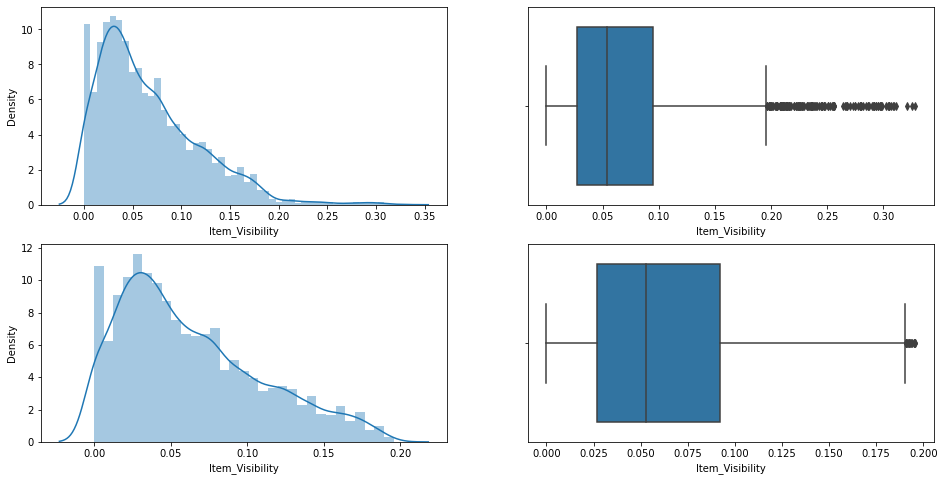

In [28]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Item_Visibility'])
plt.subplot(2,2,2)
sns.boxplot(df['Item_Visibility'])
plt.subplot(2,2,3)
sns.distplot(new_df['Item_Visibility'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Item_Visibility'])
plt.show()

In [30]:
new_df_cap = df.copy()
new_df_cap['Item_Visibility'] = np.where(
    new_df_cap['Item_Visibility'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Item_Visibility'] < lower_limit,
        lower_limit,
        new_df_cap['Item_Visibility']
    )
)

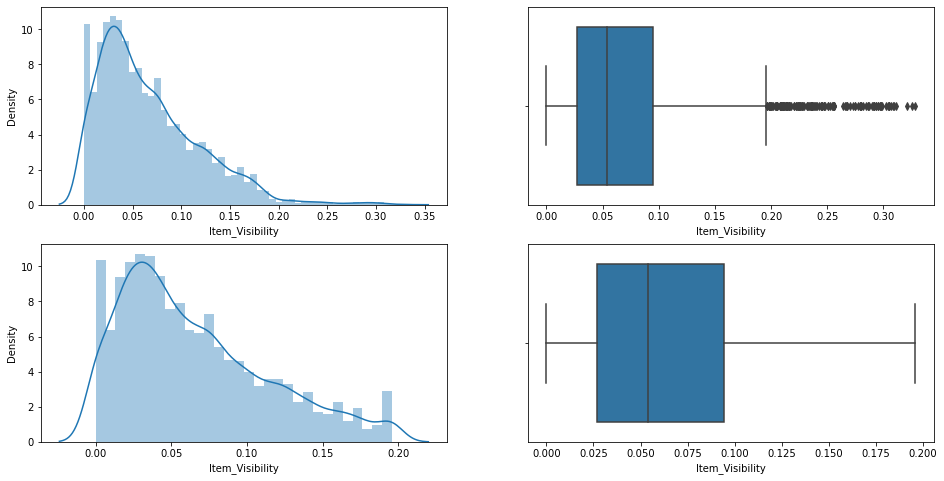

In [31]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Item_Visibility'])
plt.subplot(2,2,2)
sns.boxplot(df['Item_Visibility'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Item_Visibility'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Item_Visibility'])
plt.show()

In [32]:
# Removing the Outliers
Q1 = df['Item_Outlet_Sales'].quantile(0.25)
Q3 = df['Item_Outlet_Sales'].quantile(0.75)

In [33]:
IQR = Q3-Q1

In [34]:
IQR

2267.049

In [35]:
u_l = Q3 + 1.5 * IQR
l_l = Q1- 1.5 * IQR

In [36]:
df[df['Item_Outlet_Sales'] > u_l]
df[df['Item_Outlet_Sales'] < l_l]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [37]:
df1 = df[df['Item_Outlet_Sales'] < upper_limit]
df1.shape

(0, 12)

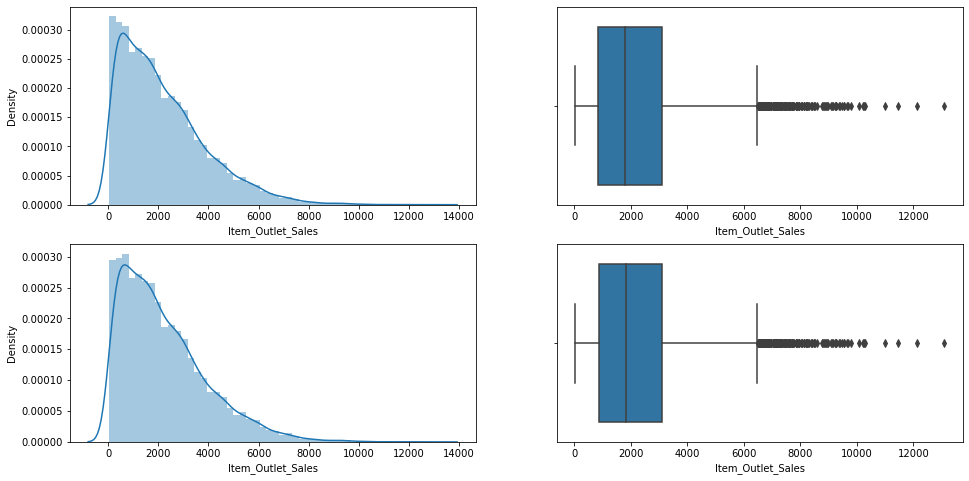

In [39]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Item_Outlet_Sales'])
plt.subplot(2,2,2)
sns.boxplot(df['Item_Outlet_Sales'])
plt.subplot(2,2,3)
sns.distplot(new_df['Item_Outlet_Sales'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Item_Outlet_Sales'])
plt.show()

In [40]:
new_df_cap = df.copy()
new_df_cap['Item_Outlet_Sales'] = np.where(
    new_df_cap['Item_Outlet_Sales'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Item_Outlet_Sales'] < lower_limit,
        lower_limit,
        new_df_cap['Item_Outlet_Sales']
    )
)

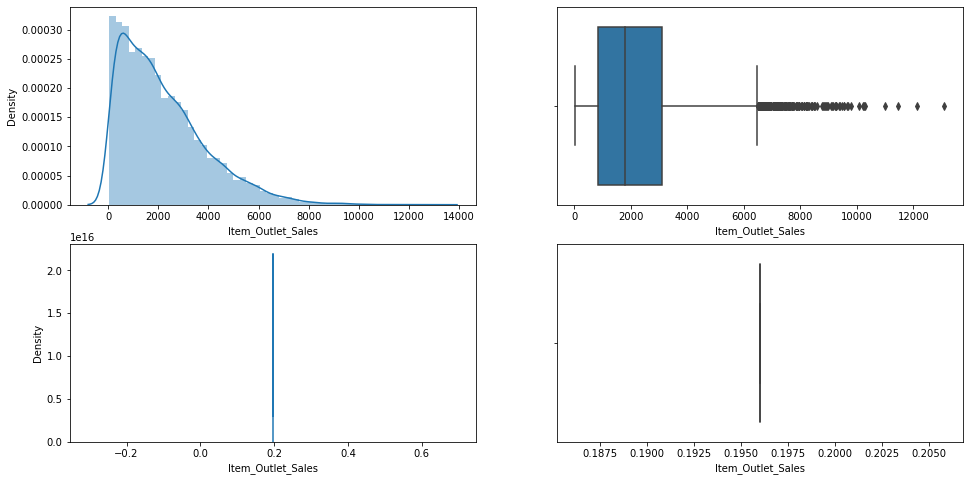

In [41]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['Item_Outlet_Sales'])
plt.subplot(2,2,2)
sns.boxplot(df['Item_Outlet_Sales'])
plt.subplot(2,2,3)
sns.distplot(new_df_cap['Item_Outlet_Sales'])
plt.subplot(2,2,4)
sns.boxplot(new_df_cap['Item_Outlet_Sales'])
plt.show()